In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\Codes\Regression\HousingData.csv')
df.head()
print(df.shape)

(506, 14)


# Aim: Data Cleaning 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# *Column Abbrevations*
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's ---> Price of House ---> Output

In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
pd.get_dummies(df,dummy_na=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Data Cleaning involves Two options
 - Removing
 - Replacing [Mean,Median,Mode]

In [6]:
df.dropna()
# Dropped null value records

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


* *Removed (506 - 394) = 112 records*
* *Which is 22.13% of total records*
* Therefore, removing is not suggestable


# Replacing the values


In [7]:
ls = []
for word in df:
    if (df[word].isnull().sum() != 0):
        ls.append(word)
    
    
ls
# appending the column names into the list named 'ls', if there exists some null values in the column

# ls is list with column names which have null haves in them

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [8]:
# measuring skewness

mean = []
median = 0
mean = [(df[word].skew() < 1) and (df[word].skew() >-1) for word in ls]
for word in ls:
    
    skewness = df[word].skew()
    if (skewness < 1) and (skewness > -1):
        print (word,":",skewness,":","Normally distributed")
        
    
    elif(skewness > 1):
        print (word,":",skewness,":","Right Skewed")
        
        
    else:
        print (word,":",skewness,":","Left Skewed")
        

print(mean)    


CRIM : 5.2128426499800975 : Right Skewed
ZN : 2.2566126051408197 : Right Skewed
INDUS : 0.30372218758107833 : Normally distributed
CHAS : 3.382293166246438 : Right Skewed
AGE : -0.5824700575056604 : Normally distributed
LSTAT : 0.908891836957813 : Normally distributed
[False, False, True, False, True, True]


In [9]:
for index,word in enumerate(ls):

    if (mean[index]==True) :
        df[word].fillna(df[word].mean(),inplace = True)
        # 'INDUS','AGE','LSTAT' ---> if Normally Distributed then replace with mean value
        
    elif (ls[index] == 'CHAS'):
        df[word].fillna(df[word].mode()[0],inplace = True)
        # 'CHAS' ---> if Discrete then replace with most repeated element(i.e, mode)
    else:
        df[word].fillna(df[word].median(),inplace = True)
        # 'CRIM','ZN' ---> if Right Skewed or Left Skewed then replace with median value




In [10]:
df.isnull().sum()
# All null values are removed

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True)
df.shape
# duplicates dropped, eventhough the shape is same as previous, therefore there is no duplicated record


(506, 14)

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.185359,0.392063,-0.055585,0.410971,-0.220045,0.346395,-0.366025,0.601224,0.560469,0.277964,-0.365336,0.437866,-0.383895
ZN,-0.185359,1.000000,-0.507800,-0.032992,-0.498619,0.312295,-0.534831,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.400912,0.362292
INDUS,0.392063,-0.507800,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.055585,-0.032992,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047808,0.183844
NOX,0.410971,-0.498619,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.220045,0.312295,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.346395,-0.534831,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366025,0.632428,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.601224,-0.300061,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.560469,-0.304385,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


# Outliers

<Axes: >

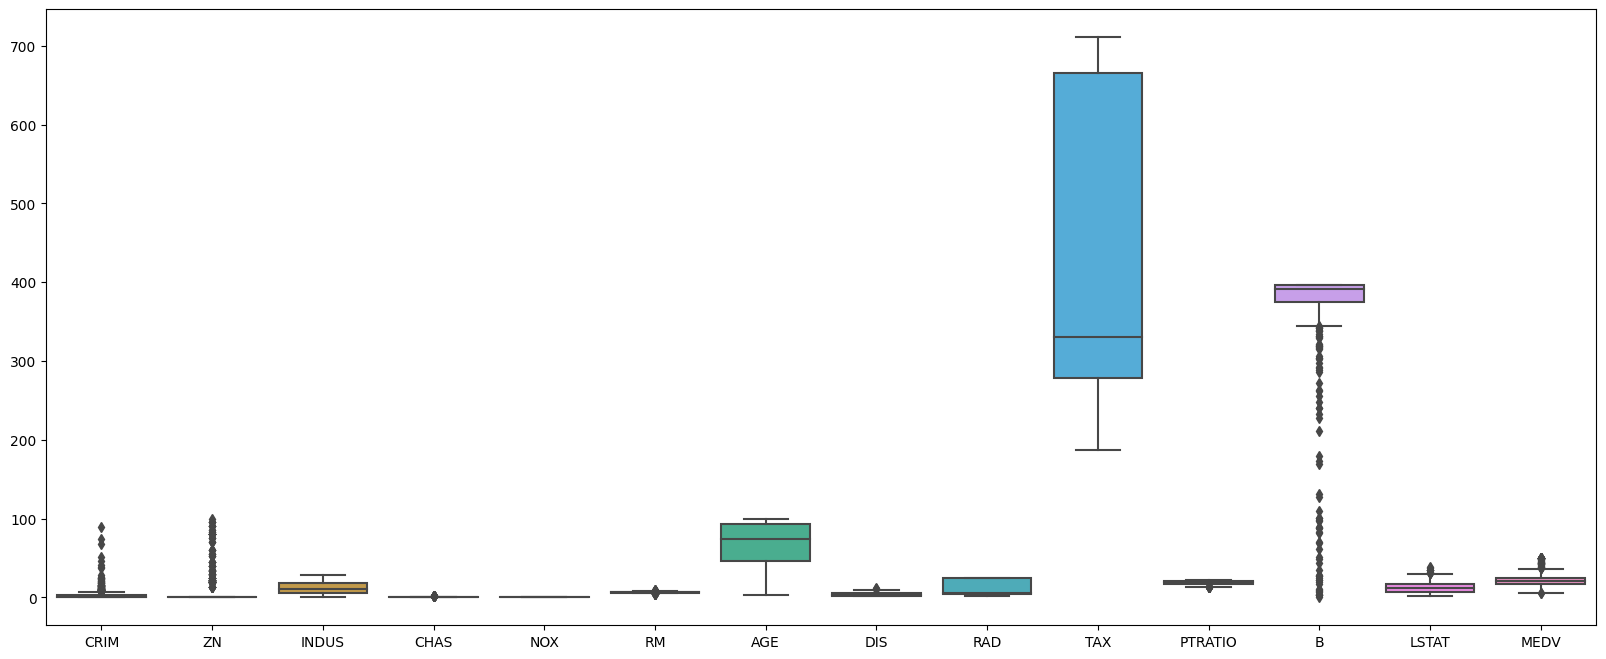

In [13]:
plt.figure(figsize=(20, 8))
sns.boxplot(df)


In [99]:
from feature_engine.outliers import Winsorizer
df_win = df
for word in df:
    win = Winsorizer(capping_method = 'gaussian', tail = 'both',fold = 1.5,variables = [word]) # Capping method ---> Gaussian
    df_win[[word]] = win.fit_transform(df[[word]])
    print(win.left_tail_caps_,win.right_tail_caps_)

df_win

{'CRIM': -0.06745541894207863} {'CRIM': 0.815572575405838}
{'ZN': -7.046233367375992} {'ZN': 15.760783390060274}
{'INDUS': 2.117577042852343} {'INDUS': 19.687560646439934}
{'CHAS': -0.026757628944106784} {'CHAS': 0.0384196370584622}
{'NOX': 0.3979209450640366} {'NOX': 0.6944950707974333}
{'RM': 5.5428951682233185} {'RM': 6.962164489379954}
{'AGE': 33.50421168284338} {'AGE': 106.91031940894865}
{'DIS': 1.0739637469715753} {'DIS': 6.076804050704293}
{'RAD': -2.0120772972496255} {'RAD': 19.107547606265634}
{'TAX': 162.3493235669045} {'TAX': 644.0322506981242}
{'PTRATIO': 16.027013091789936} {'PTRATIO': 21.311592636429115}
{'B': 342.805821231576} {'B': 415.9388576399079}
{'LSTAT': 3.838186591369695} {'LSTAT': 20.149719983980717}
{'MEDV': 12.18575819404711} {'MEDV': 30.875363990546226}


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.053455,15.760783,3.7225,0.0,0.538,6.575000,65.200000,4.0900,1.0,296.0,16.027013,396.90,4.980000,24.000000
1,0.053455,0.000000,7.0700,0.0,0.469,6.421000,78.900000,4.9671,2.0,242.0,17.800000,396.90,9.140000,21.600000
2,0.053455,0.000000,7.0700,0.0,0.469,6.962164,61.100000,4.9671,2.0,242.0,17.800000,392.83,4.030000,30.875364
3,0.053455,0.000000,3.7225,0.0,0.458,6.962164,45.800000,6.0622,3.0,222.0,18.700000,394.63,3.838187,30.875364
4,0.069050,0.000000,3.7225,0.0,0.458,6.962164,54.200000,6.0622,3.0,222.0,18.700000,396.90,12.715432,30.875364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.062630,0.000000,11.9300,0.0,0.573,6.593000,69.100000,2.4786,1.0,273.0,21.000000,391.99,12.715432,22.400000
502,0.053455,0.000000,11.9300,0.0,0.573,6.120000,76.700000,2.2875,1.0,273.0,21.000000,396.90,9.080000,20.600000
503,0.060760,0.000000,11.9300,0.0,0.573,6.962164,91.000000,2.1675,1.0,273.0,21.000000,396.90,5.640000,23.900000
504,0.109590,0.000000,11.9300,0.0,0.573,6.794000,89.300000,2.3889,1.0,273.0,21.000000,393.45,6.480000,22.000000


<Axes: >

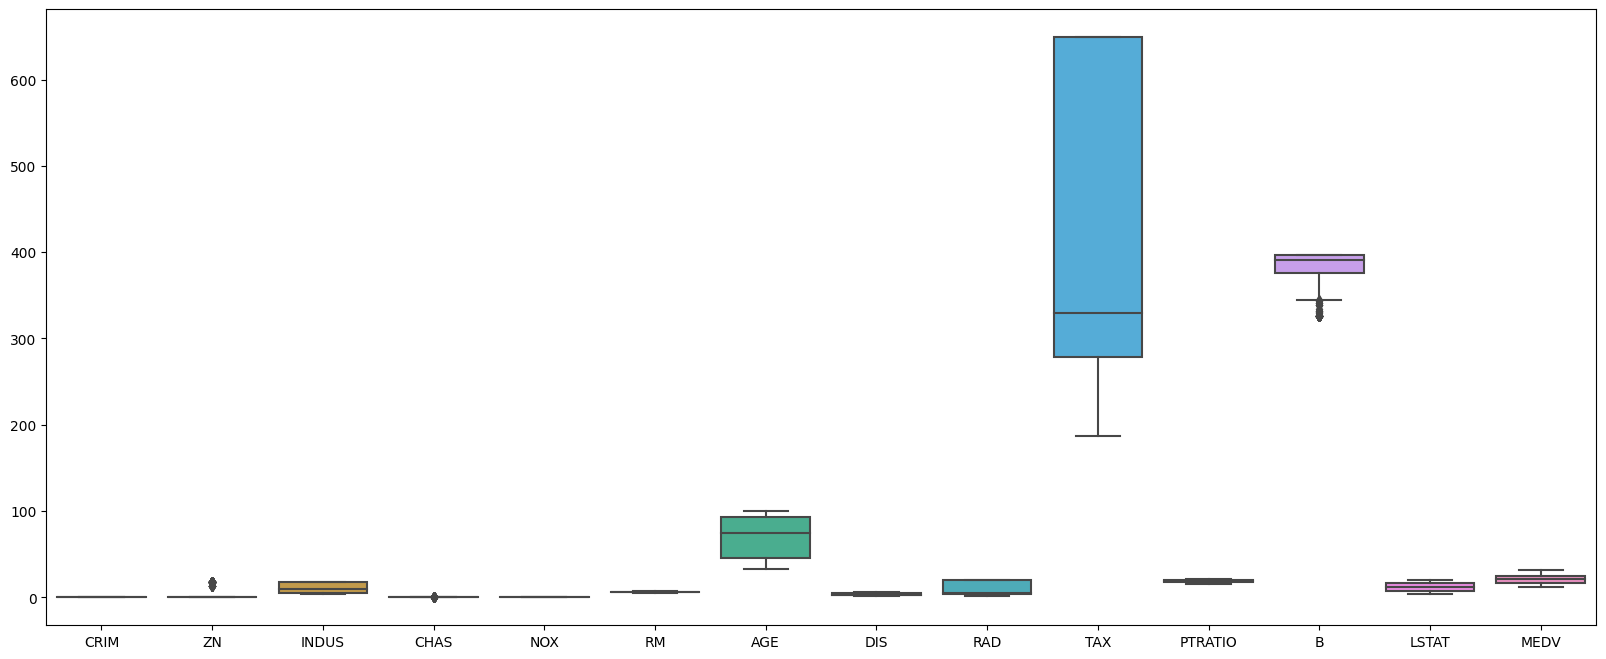

In [69]:
plt.figure(figsize=(20, 8))
sns.boxplot(df_win)
# outliers

In [70]:
df = df_win

# Exploratory Data Analysis

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

c:\Users\jayak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jayak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jayak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jayak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\jayak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been as

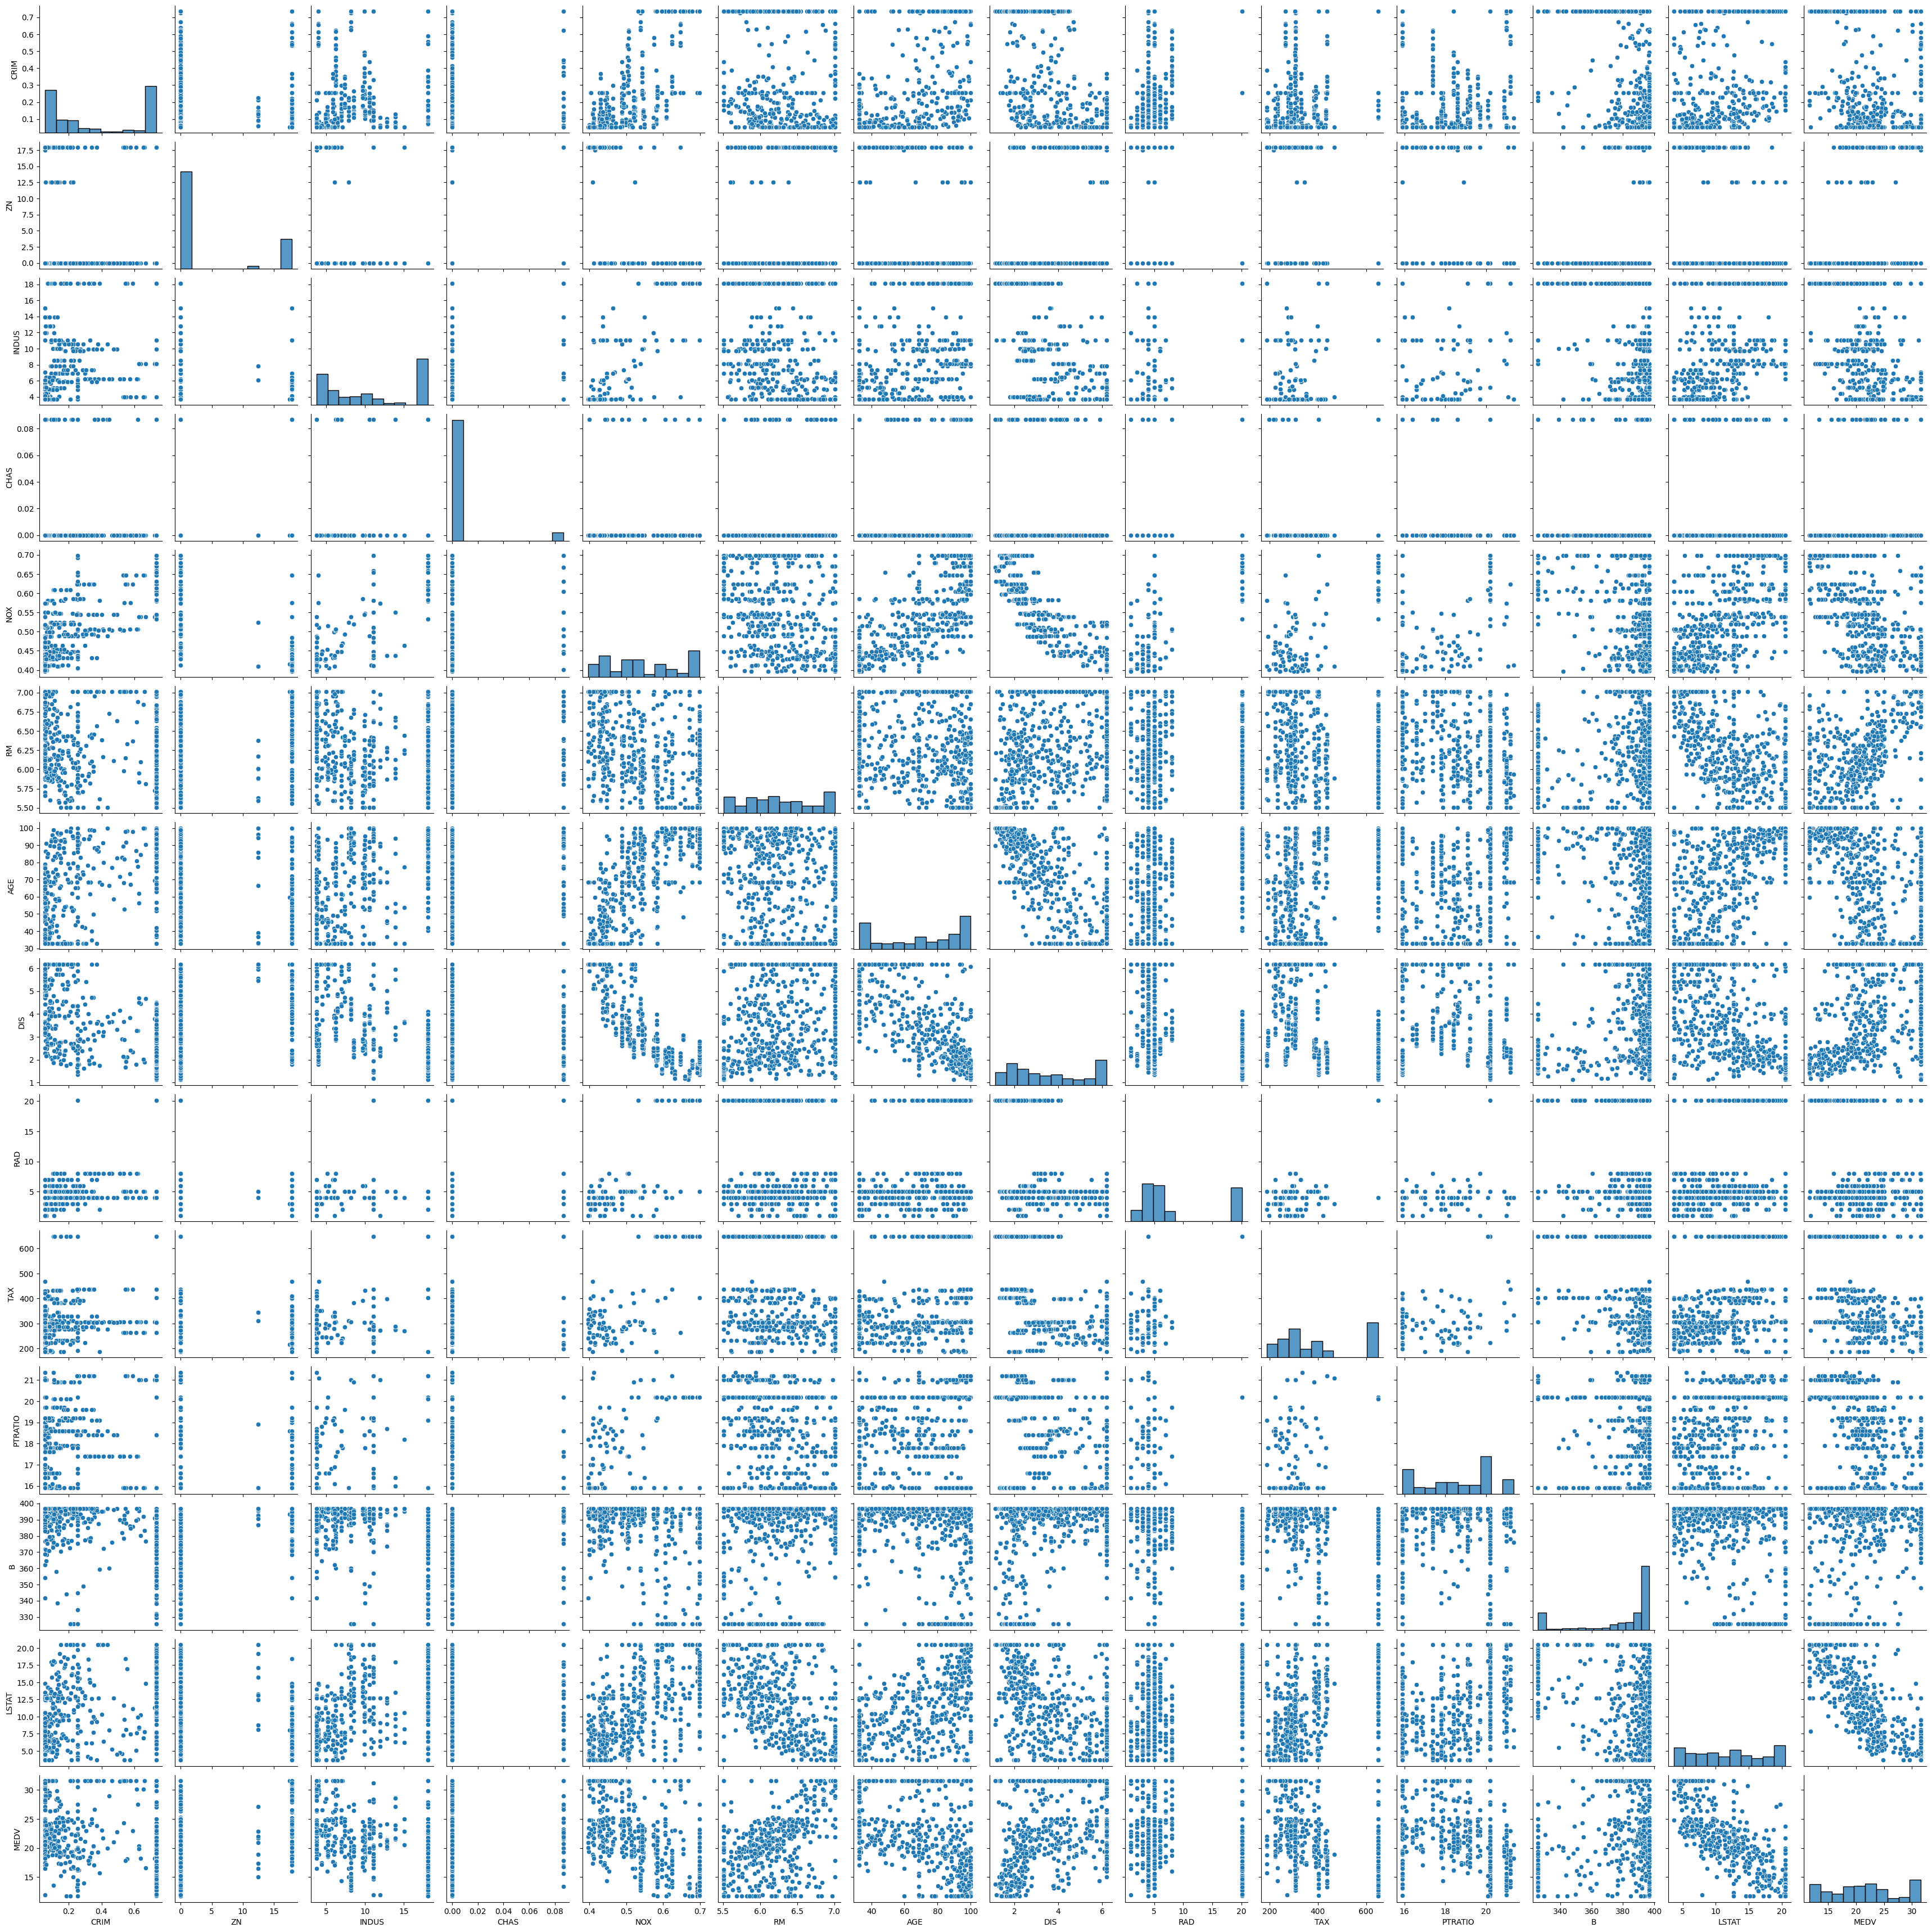

In [73]:
sns.pairplot(df,palette="Paired")

<Axes: ylabel='Count'>

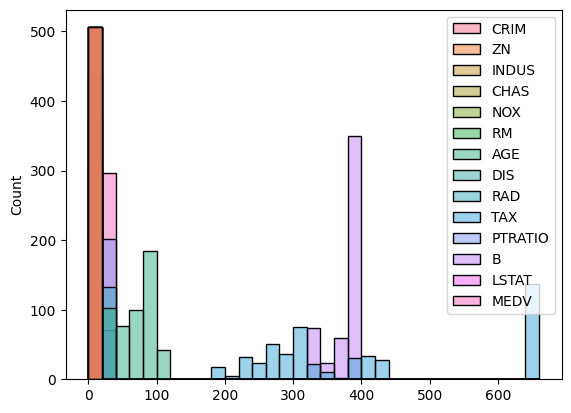

In [74]:
sns.histplot(df,binwidth=20)

# Data Splitting

In [75]:
X = df.drop('MEDV',axis = 1)
y = df['MEDV']

In [76]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [77]:
cv = {}
# Creating a dict to store cv scores for different Regression models

# Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

# Fitting training dataset into the model

print("Train R2 Score: ",linear_model.score(X_train,y_train))
print("Test R2 Score: ",linear_model.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(linear_model,X,y,cv = 5).mean()
print("Cross Validation Score = ",cv_score )
cv['Linear_model'] = cv_score*100
cv

Train R2 Score:  0.7946454604795129
Test R2 Score:  0.7971459744620764
Cross Validation Score =  0.6128245016968172


{'Linear_model': 61.282450169681724}

# Lasso Regression

In [80]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_base = Lasso(alpha=0.01)
lasso_base.fit(X_train,y_train)

print("Train R2 Score: ",lasso_base.score(X_train,y_train))

print("Test R2 Score: ",lasso_base.score(X_test,y_test))


# parameters = {'alpha':[0.1,0.5,1,2,5,10,20,30,40,50,60,70,80,90,100]}
# lassocv = GridSearchCV(lasso_base,parameters,scoring = 'neg_mean_squared_error',cv = 5)
# lassocv.fit(X_train,y_train)

# print(lassocv.best_score_) #-----> alpha = 1 is best param

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lasso_base,X,y,cv = 5).mean()




print("Cross Validation Score = ", cv_score)
cv['Lasso_model'] = cv_score*100
cv




Train R2 Score:  0.7870083388118276
Test R2 Score:  0.779009970737976
Cross Validation Score =  0.5921382796298015


{'Linear_model': 61.282450169681724, 'Lasso_model': 59.21382796298015}

# ElasticNet Regressor

In [82]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train,y_train)

print("Train R2 Score: ",elasticnet.score(X_train,y_train))
print("Test R2 Score: ",elasticnet.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(elasticnet,X,y,cv = 5).mean()
print("Cross Validation Score = ",cv_score )
cv['Elastic Net'] = cv_score*100
cv

Train R2 Score:  0.7273520707805972
Test R2 Score:  0.7077460794043058
Cross Validation Score =  0.47435957329439427


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425}

In [83]:
cv

{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425}

# Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train,y_train)

np.random.seed(12)
print("Train R2 Score: ",decision_tree.score(X_train,y_train))
print("Test R2 Score: ",decision_tree.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
# cv_score = cross_val_score(decision_tree,X,y,cv = 5).mean()


# Set an initial random seed
best_random_state = 0
highest_cv_score = float('-inf')  # Initialize with negative infinity

# Define the range of random seed values you want to try
seed_range = range(1, 101)  # Adjust the range as needed

for random_state in seed_range:
    # Initialize and train Decision Tree model with current random seed
    decision_tree = DecisionTreeRegressor(max_depth=5, random_state=random_state)
    decision_tree.fit(X_train, y_train)

    # Calculate Cross-Validation Score
    cv_score = cross_val_score(decision_tree, X, y, cv=5).mean()

    # Update best_random_state and highest_cv_score if a higher score is found
    if cv_score > highest_cv_score:
        highest_cv_score = cv_score
        best_random_state = random_state

# Print the best random seed and corresponding highest cross-validation score
# print("Best Random State:", best_random_state)
# print("Highest Cross Validation Score:", highest_cv_score)
        
print("Cross Validation Score = ", highest_cv_score)
cv['Decision Tree Regressor'] = highest_cv_score*100
cv



Train R2 Score:  0.9844557152134754
Test R2 Score:  0.7038340607022265
Cross Validation Score =  0.46933437724190574


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425,
 'Decision Tree Regressor': 46.933437724190576}

# Decision Tree + Ada Boost

In [85]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr= AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=65)

regr.fit(X_train,y_train)

print("Train R2 Score: ",regr.score(X_train,y_train))

print("Test R2 Score: ",regr.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(regr,X,y,cv = 5).mean()
print("Cross Validation Score = ", cv_score)
cv['Decision Tree + Ada Boost'] = cv_score*100
cv



Train R2 Score:  0.9206208360469876
Test R2 Score:  0.8133944515697412
Cross Validation Score =  0.5224907775730234


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425,
 'Decision Tree Regressor': 46.933437724190576,
 'Decision Tree + Ada Boost': 52.249077757302345}

# Decision Tree + Gradient Boost

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(X_train,y_train)

print("Train R2 Score: ",gradient_boost.score(X_train,y_train))
print("Test R2 Score: ",gradient_boost.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gradient_boost,X,y,cv = 5).mean()
print("Cross Validation Score = ",cv_score)
cv['Decision Tree + Gradient Boost'] = cv_score*100
cv

Train R2 Score:  0.9711997832931907
Test R2 Score:  0.8295219412747611
Cross Validation Score =  0.6167998305713829


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425,
 'Decision Tree Regressor': 46.933437724190576,
 'Decision Tree + Ada Boost': 52.249077757302345,
 'Decision Tree + Gradient Boost': 61.67998305713829,
 'Random Forest Regressor': 63.757167667212975,
 'Support Vector Regressor': 57.16146300011567}

# Random Forest Regressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100)

random_forest.fit(X_train,y_train)

np.random.seed(12)
print("Train R2 Score: ",random_forest.score(X_train,y_train))
print("Test R2 Score: ",random_forest.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(random_forest,X,y,cv = 5).mean()
print("Cross Validation Score = ", cv_score)
cv['Random Forest Regressor'] = cv_score*100
cv

# #Set an initial random seed
# best_random_state = 0
# highest_cv_score = float('-inf')  # Initialize with negative infinity

# # Define the range of random seed values you want to try
# seed_range = range(1, 101)  # Adjust the range as needed

# for random_state in seed_range:
#     # Initialize and train Decision Tree model with current random seed
#     abc = RandomForestRegressor(n_estimators = 100, random_state=random_state)
#     abc.fit(X_train, y_train)

#     # Calculate Cross-Validation Score
#     cv_score = cross_val_score(abc, X, y, cv=5).mean()

#     # Update best_random_state and highest_cv_score if a higher score is found
#     if cv_score > highest_cv_score:
#         highest_cv_score = cv_score
#         best_random_state = random_state

# # Print the best random seed and corresponding highest cross-validation score
# print("Best Random State:", best_random_state)
# print("Highest Cross Validation Score:", highest_cv_score)
        


Train R2 Score:  0.9758104566334503
Test R2 Score:  0.829319077648727
Cross Validation Score =  0.6375716766721298


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425,
 'Decision Tree Regressor': 46.933437724190576,
 'Decision Tree + Ada Boost': 52.249077757302345,
 'Decision Tree + Gradient Boost': 61.67998305713829,
 'Random Forest Regressor': 63.757167667212975,
 'Support Vector Regressor': 57.16146300011567}

# Support Vector Regressor

In [94]:
from sklearn.svm import SVR
sup_vec_reg = SVR(kernel = 'linear',degree=1)
sup_vec_reg.fit(X_train,y_train)
print("Train R2 Score: ",sup_vec_reg.score(X_train,y_train))
print("Test R2 Score: ",sup_vec_reg.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(sup_vec_reg,X,y,cv = 5).mean()
print("Cross Validation Score = ",cv_score)
cv['Support Vector Regressor'] = cv_score*100
cv


Train R2 Score:  0.7729814265025714
Test R2 Score:  0.7423688174644796
Cross Validation Score =  0.5716146300011566


{'Linear_model': 61.282450169681724,
 'Lasso_model': 59.21382796298015,
 'Elastic Net': 47.435957329439425,
 'Decision Tree Regressor': 46.933437724190576,
 'Decision Tree + Ada Boost': 52.249077757302345,
 'Decision Tree + Gradient Boost': 61.67998305713829,
 'Random Forest Regressor': 63.757167667212975,
 'Support Vector Regressor': 57.16146300011567}

# Plot Accuracy Graphs


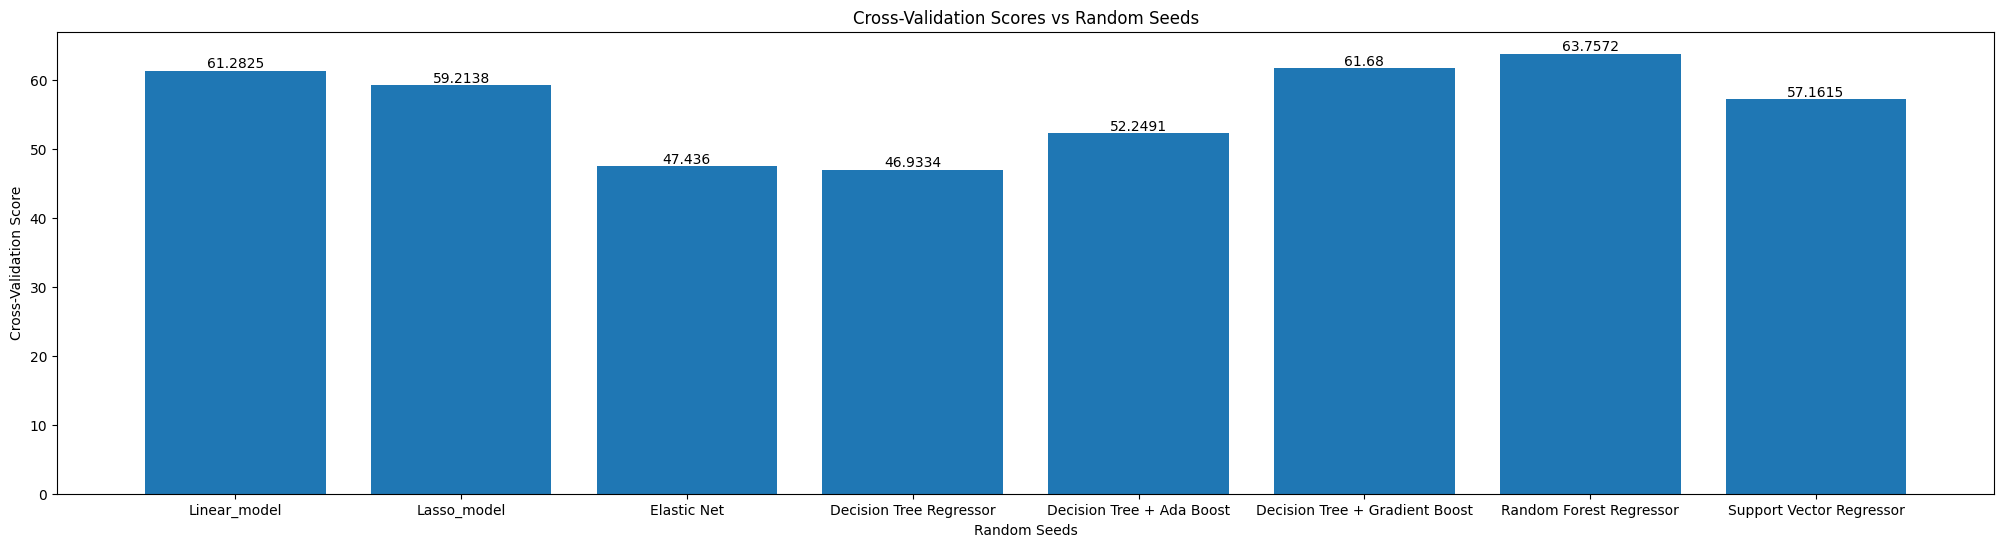

In [95]:
import matplotlib.pyplot as plt



# Extract keys (e.g., random seeds) and values (cross-validation scores)
random_seeds = list(cv.keys())
cv_scores = list(cv.values())
plt.figure(figsize=(25, 6))
# Plot the bar graph
hbar = plt.bar(random_seeds, cv_scores)
plt.title('Cross-Validation Scores vs Random Seeds')
plt.xlabel('Random Seeds')
plt.ylabel('Cross-Validation Score')
plt.bar_label(hbar)
plt.show()


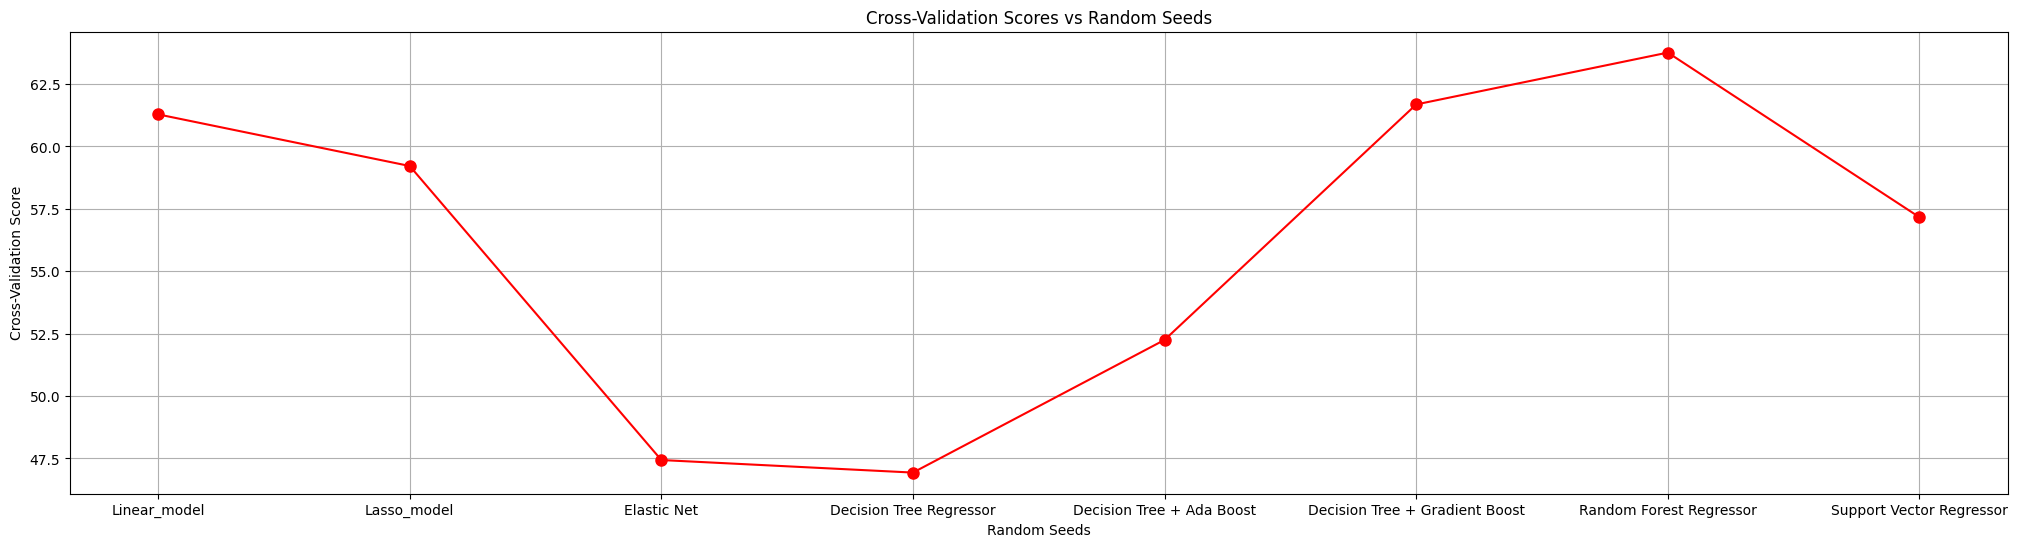

In [98]:
plt.figure(figsize=(25, 6))
# Plot the line graph
plt.plot(random_seeds, cv_scores,marker = 'o',color = 'red',markersize = 8,mouseover = True)
plt.title('Cross-Validation Scores vs Random Seeds')
plt.xlabel('Random Seeds')
plt.ylabel('Cross-Validation Score')
plt.grid()
plt.show()